In [1]:
import numpy as np

In [76]:
length=100
dx = np.random.choice([-1, 1], size=length)
dx.cumsum()

array([ -1,  -2,  -1,  -2,  -1,   0,   1,   2,   1,   2,   3,   4,   3,
         2,   3,   2,   1,   0,   1,   0,  -1,  -2,  -3,  -2,  -3,  -4,
        -5,  -4,  -5,  -4,  -3,  -4,  -5,  -6,  -7,  -6,  -7,  -8,  -9,
        -8,  -7,  -6,  -7,  -6,  -5,  -6,  -5,  -4,  -5,  -6,  -7,  -8,
        -9,  -8,  -7,  -6,  -7,  -8,  -7,  -6,  -7,  -8,  -9, -10, -11,
       -12, -13, -14, -15, -16, -17, -16, -17, -16, -15, -14, -13, -14,
       -13, -12, -11, -12, -11, -12, -11, -10,  -9,  -8,  -9,  -8,  -9,
        -8,  -9, -10,  -9,  -8,  -7,  -8,  -9, -10])

In [42]:
import numpy as np
import matplotlib.pyplot as plt
def create_random_walk(n: int) -> np.array:
    dx = np.random.normal(scale=1.0, size=n)
    return dx.cumsum()


In [183]:
np.partition(windowed,1,axis=1)

array([[-8.91154003, -8.89385195,  1.4380549 , ..., -4.35428734,
        -2.63645659, -1.86132875],
       [-8.91154003, -8.89385195,  0.58735575, ..., -2.63645659,
        -1.86132875, -1.52672434],
       [-8.91154003, -8.89385195,  0.25377844, ..., -1.86132875,
        -1.52672434, -3.88798984],
       ...,
       [91.50145541, 91.68314875, 99.45362596, ..., 93.26004854,
        92.76810983, 91.97444098],
       [91.29196105, 91.50145541, 99.20645135, ..., 92.76810983,
        91.97444098, 98.85018183],
       [91.29196105, 91.50145541, 99.04176034, ..., 91.97444098,
        99.45362596, 92.04921555]])

In [174]:
np.partition(windowed,1,axis=1)[:,0].shape

(99901,)

In [182]:
np.partition(windowed,1,axis=1)[:,0]

array([-8.91154003, -8.91154003, -8.91154003, ..., 91.50145541,
       91.29196105, 91.29196105])

In [175]:
np.partition(windowed,1,axis=1)[:,0] - np.min(windowed,axis=1)
#window_means.shape

array([0., 0., 0., ..., 0., 0., 0.])

In [184]:
np.partition?

In [248]:
k=2
np.partition(windowed,k)
np.partition(windowed,-2,axis=1)[:,-2] - np.max(windowed,axis=1)
#windowed

array([-0.20973358, -1.53835074, -1.44899543, ..., -0.59907678,
       -0.39069567, -0.39069567])

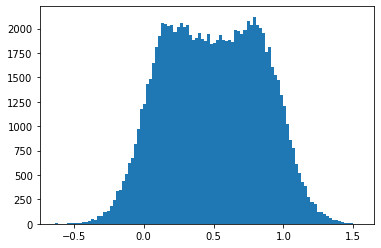

In [284]:
def calculate_bollinger_band(x: np.array, bandwidth=100) -> np.array:
    windowed = moving_window_2d(x, bandwidth)
    window_means = windowed.mean(axis=1)
    window_sds = windowed.std(axis=1)
    lower, upper = window_means - 2 * window_sds, window_means + 2 * window_sds
    return (x[bandwidth-1:] - lower) / (upper - lower)
rw = create_random_walk(100000)
bband = calculate_bollinger_band(rw, bandwidth=100)
_ = plt.hist(bband, bins=100)

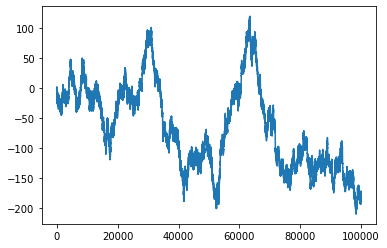

In [285]:
plt.plot(rw)

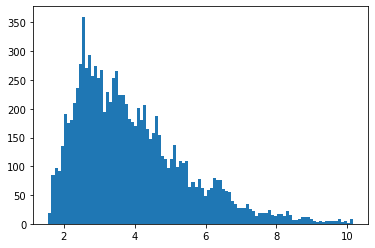

In [316]:
def calculate_bollinger_band(x: np.array, bandwidth=100) -> np.array:
    windowed = moving_window_2d(x, bandwidth)
    window_means = windowed.mean(axis=1)
    window_sds = windowed.std(axis=1)
    lower, upper = window_means - 2 * window_sds, window_means + 2 * window_sds
    #return (x[bandwidth-1:] - lower) / (upper - lower)
    return window_sds
rw = create_random_walk(10000)
bband = calculate_bollinger_band(rw, bandwidth=100)
_ = plt.hist(bband, bins=100)

In [319]:
bband.shape

(9901,)

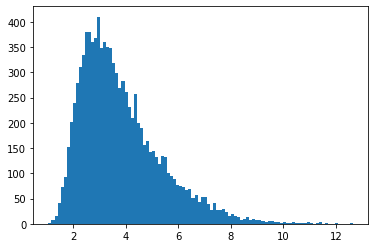

In [317]:
stdevs = []
for _ in range(10000):
    rw = create_random_walk(100)
    stdevs.append(rw.std())
_ = plt.hist(stdevs,bins=100)

In [321]:
np.array(stdevs).shape

(10000,)

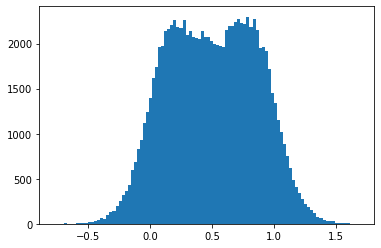

In [311]:
stdevs = []
means = []
lowers = []
uppers = []
for _ in range(100000):
    
    rw = create_random_walk(100)
    stdevs.append(rw.std())
    means.append(rw.mean())
    lower = rw.mean() - 2 * rw.std()
    upper = rw.mean() + 2 * rw.std()
    lowers.append(lower)
    uppers.append(upper)
#for LstStat in [stdevs, means, lowers, uppers]:
#    LstStat = np.array(LstStat)
stdevs = np.array(stdevs)
means = np.array(means)
lowers = np.array(lowers)
uppers = np.array(uppers)
    

_ = plt.hist(- lowers/(uppers - lowers),bins=100)

In [309]:
type(lowers)

list

In [308]:
_ = plt.hist(- lowers/(uppers - lowers),bins=100)

TypeError: bad operand type for unary -: 'list'

(array([1.7735e+04, 4.2349e+04, 2.4101e+04, 1.0307e+04, 3.8010e+03,
        1.2900e+03, 3.3100e+02, 6.9000e+01, 1.4000e+01, 3.0000e+00]),
 array([ 1.00567798,  2.4186601 ,  3.83164222,  5.24462434,  6.65760646,
         8.07058858,  9.4835707 , 10.89655282, 12.30953494, 13.72251706,
        15.13549918]),
 <a list of 10 Patch objects>)

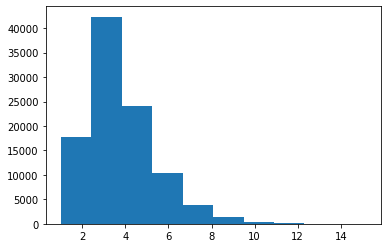

In [298]:
plt.hist(stdevs)

In [ ]:
kth smallest

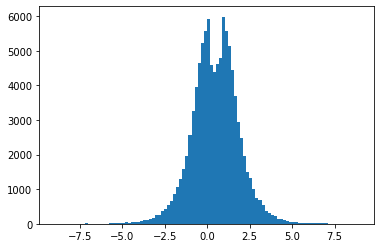

In [258]:
def calculate_bollinger_band(x: np.array, bandwidth=100) -> np.array:
    k=30
    windowed = moving_window_2d(x, bandwidth)
    window_means = windowed.mean(axis=1)
    window_sds = windowed.std(axis=1)
    window_mins = windowed.min(axis=1)
    window_maxs = windowed.max(axis=1)
    window_mink = np.partition(windowed,k-1,axis=1)[:,k-1] 
    window_maxk = np.partition(windowed,-k,axis=1)[:,-k]
    lower, upper = window_means - 2 * window_sds, window_means + 2 * window_sds
    return (x[bandwidth-1:] - window_mink) / (window_maxk - window_mink)
rw = create_random_walk(100000)
bband = calculate_bollinger_band(rw, bandwidth=100)
_ = plt.hist(bband, bins=100)

(99996,)

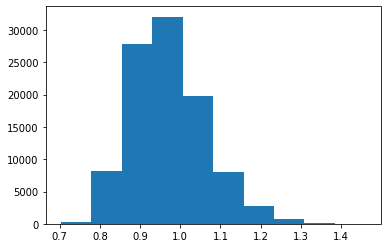

In [277]:
def calculate_bollinger_band(x: np.array, bandwidth=100) -> np.array:
    k = 99
    windowed = moving_window_2d(x, bandwidth)
    window_means = windowed.mean(axis=1)
    window_sds = windowed.std(axis=1)
    window_mins = windowed.min(axis=1)
    window_maxs = windowed.max(axis=1)
    window_mink = np.partition(windowed,k-1,axis=1)[:,k-1] 
    lower, upper = window_means - 2 * window_sds, window_means + 2 * window_sds
    #return (x[bandwidth-1:] - window_mins) / (window_maxs - window_mins)
    return lower, upper, window_mins, window_maxs, window_mink
rw = create_random_walk(100000)
#bband = calculate_bollinger_band(rw, bandwidth=100)
lower, upper, window_mins, window_maxs, kth_small = calculate_bollinger_band(rw, bandwidth=100)
#_ = plt.hist(bband, bins=100)
_ = plt.hist((kth_small - lower)/(upper - lower))

In [98]:
def moving_window_2d(x: np.array, window: int) -> np.array:
    """
    For example:
       > moving_window_2d([1, 2, 3, 4, 5, 6], window=3)
       [[1, 2, 3], [2, 3, 4], [3, 4, 5], [4, 5, 6]]
    """   
    return np.lib.stride_tricks.as_strided(
        x,
        shape=(x.size - window + 1, window),
        strides=(x.strides[0], x.strides[0]))
def calculate_bollinger_band(x: np.array, bandwidth=100) -> np.array:
    windowed = moving_window_2d(x, bandwidth)
    window_means = windowed.mean(axis=1)
    window_sds = windowed.std(axis=1)
    window_mins = windowed.min(axis=1)
    window_maxs = windowed.max(axis=1)
    lower, upper = window_means - 2 * window_sds, window_means + 2 * window_sds
    #lowerp, upperp = np.percentile(windowed,.05,axis=1), np.percentile(windowed,.95,axis=1)
    return (x[bandwidth-1:] - lower) / (upper - lower)
    #return (x[bandwidth-1:] - lowerp) / (upperp - lowerp)
rw = create_random_walk(100000)
bband = calculate_bollinger_band(rw, bandwidth=100)

In [94]:
#window_means
np.percentile(windowed,.05,axis=1) - lower

array([2.38011434, 2.53116045, 2.66297511, ..., 0.435888  , 0.3544915 ,
       0.32043349])

In [96]:
#rw[99:]


array([-13.71998506, -13.87103117, -14.00284583, ..., 268.48233945,
       268.56373595, 268.59779397])

In [92]:
window_means.shape

(99901,)

In [ ]:
take 100 days in...
where is that relative to 


In [86]:
rw[99:]

array([  4.76802094,   6.08169297,   5.48200282, ..., 276.93054348,
       278.02781955, 278.96235104])

In [206]:
    windowed = moving_window_2d(rw, 5)
    window_means = windowed.mean(axis=1)
    window_sds = windowed.std(axis=1)
    window_mins = windowed.min(axis=1)
    window_maxs = windowed.max(axis=1)
    lowerp, upperp = np.percentile(windowed,.05,axis=1), np.percentile(windowed,.95,axis=1)
    lower, upper = window_means - 2 * window_sds, window_means + 2 * window_sds
    (rw[5-1:] - lower) / (upper - lower)

array([0.58545385, 0.97045126, 0.53116662, ..., 0.1364897 , 0.05488658,
       0.29314567])

In [138]:
#np.argpartition(windowed,5,axis=1).shape
#windowed.shape
np.argsort(windowed,axis=1)[:,3].shape

(99901,)

In [140]:
((rw[100-1:] - window_mins) / (window_maxs - window_mins)==0).sum()

5612

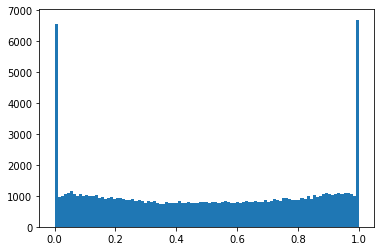

In [105]:
_ = plt.hist((rw[100-1:] - window_mins) / (window_maxs - window_mins),bins=99)
#_ = plt.hist((rw[100-1:] - lower) / (upper - lower),bins=100)

In [45]:
np.percentile(windowed,.05,axis=1)
lower

array([-13.71998506, -13.87103117, -14.00284583, ..., 268.48233945,
       268.56373595, 268.59779397])

In [58]:
#lowerp.shape
#rw[100-1:].shape
#upperp.shape
_ = (rw[100-1:] - lowerp) / (upperp - lowerp)

In [63]:
(rw[100-1:] - lowerp) / (upperp - lowerp)

array([203.77403173, 220.3927334 , 212.8063104 , ...,  15.19420181,
        17.27502764,  19.04723183])

(array([9.9558e+04, 1.1800e+02, 1.0900e+02, 2.2000e+01, 4.0000e+00,
        1.0000e+00, 1.0000e+00, 2.0000e+00, 1.0000e+00, 0.0000e+00,
        1.0000e+00, 2.0000e+00, 2.0000e+00, 3.0000e+00, 3.0000e+00,
        4.0000e+00, 4.0000e+00, 3.0000e+00, 0.0000e+00, 1.0000e+00,
        1.0000e+00, 1.0000e+00, 2.0000e+00, 1.0000e+00, 0.0000e+00,
        1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00,
        1.0000e+00, 0.0000e+00, 1.0000e+00, 1.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 1.0000e+00, 1.0000e+00, 5.0000e+00,
        0.0000e+00, 1.0000e+00, 1.0000e+00, 3.0000e+00, 1.0000e+00,
        3.0000e+00, 2.0000e+00, 2.0000e+00, 0.0000e+00, 3.0000e+00,
        3.0000e+00, 2.0000e+00, 4.0000e+00, 1.0000e+00, 1.0000e+00,
        1.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00, 2.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 3.0000e+00,
        0.0000e+00, 1.0000e+00, 1.0000e+00, 2.00

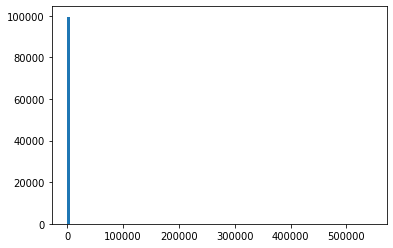

In [62]:
fig, ax = plt.subplots()
ax.hist(_,bins=100)

ValueError: operands could not be broadcast together with shapes (3,) (99901,) 

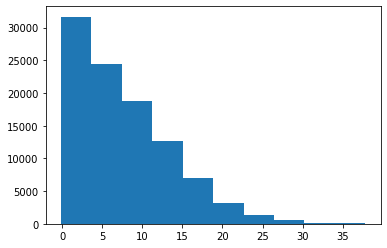

In [55]:
#plt.hist(rw[100-1:] - lowerp) / (upperp - lowerp)

ValueError: operands could not be broadcast together with shapes (3,) (99901,) 

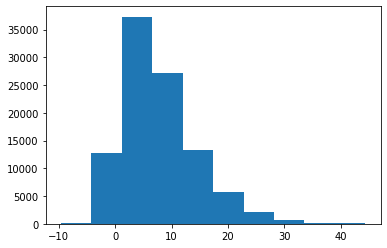

In [77]:
plt.hist(rw[100-1:] - lower) / (upper - lower)

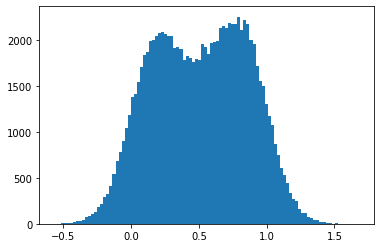

In [47]:
_ = plt.hist(bband, bins=100)

In [6]:
def create_random_walk(n: int) -> np.array:
    dx = np.random.normal(scale=1.0, size=n)
    return dx.cumsum()


In [14]:
rw = create_random_walk(100000)
windowed = moving_window_2d(rw, 2)

In [15]:
windowed

array([[-1.43246517e+00, -2.06928653e-01],
       [-2.06928653e-01, -2.97830984e-02],
       [-2.97830984e-02, -2.76528849e+00],
       ...,
       [ 8.09865497e+02,  8.12801439e+02],
       [ 8.12801439e+02,  8.14453897e+02],
       [ 8.14453897e+02,  8.15000114e+02]])

In [13]:
rw

array([-1.03026425e+00, -2.34237856e-01, -7.87849658e-01, ...,
       -5.76316230e+02, -5.75446692e+02, -5.73677380e+02])

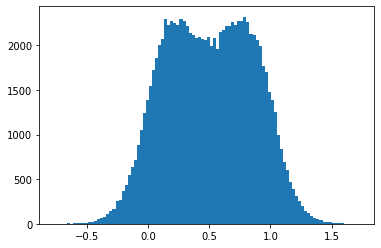

In [323]:
#stdev of RW vs. range of RW
stdevs = []
means = []
lowers = []
uppers = []
ranges = []
maxes = []
mins = []
for _ in range(100000):
    
    rw = create_random_walk(100)
    stdevs.append(rw.std())
    means.append(rw.mean())
    lower = rw.mean() - 2 * rw.std()
    upper = rw.mean() + 2 * rw.std()
    walkmax = rw.max()
    walkmin = rw.min()
    minmaxrange = rw.max() - rw.min()
    lowers.append(lower)
    uppers.append(upper)
    ranges.append(minmaxrange)
    maxes.append(walkmax)
    mins.append(walkmin)
    
#for LstStat in [stdevs, means, lowers, uppers]:
#    LstStat = np.array(LstStat)
stdevs = np.array(stdevs)
means = np.array(means)
lowers = np.array(lowers)
uppers = np.array(uppers)
ranges = np.array(ranges)
maxes = np.array(maxes)
mins = np.array(mins)
    

_ = plt.hist(- lowers/(uppers - lowers),bins=100)

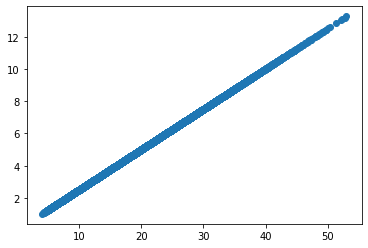

In [325]:
_ = plt.scatter(uppers - lowers, stdevs)

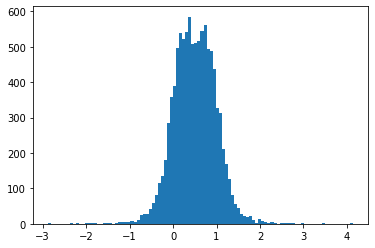

In [329]:
#stdev of RW vs. range of RW
stdevs = []
means = []
lowers = []
uppers = []
ranges = []
maxes = []
mins = []
for _ in range(10000):
    
    rw = create_random_walk(6)
    stdevs.append(rw.std())
    means.append(rw.mean())
    lower = rw.mean() - 2 * rw.std()
    upper = rw.mean() + 2 * rw.std()
    walkmax = rw.max()
    walkmin = rw.min()
    minmaxrange = rw.max() - rw.min()
    lowers.append(lower)
    uppers.append(upper)
    ranges.append(minmaxrange)
    maxes.append(walkmax)
    mins.append(walkmin)
    
#for LstStat in [stdevs, means, lowers, uppers]:
#    LstStat = np.array(LstStat)
stdevs = np.array(stdevs)
means = np.array(means)
lowers = np.array(lowers)
uppers = np.array(uppers)
ranges = np.array(ranges)
maxes = np.array(maxes)
mins = np.array(mins)
    

_ = plt.hist(- lowers/(uppers - lowers),bins=100)

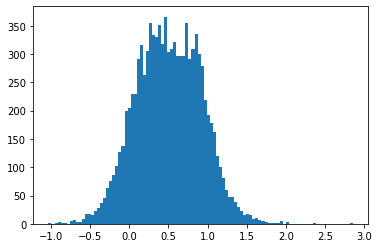

In [330]:
#stdev of RW vs. range of RW
stdevs = []
means = []
lowers = []
uppers = []
ranges = []
maxes = []
mins = []
for _ in range(10000):
    
    rw = create_random_walk(10)
    stdevs.append(rw.std())
    means.append(rw.mean())
    lower = rw.mean() - 2 * rw.std()
    upper = rw.mean() + 2 * rw.std()
    walkmax = rw.max()
    walkmin = rw.min()
    minmaxrange = rw.max() - rw.min()
    lowers.append(lower)
    uppers.append(upper)
    ranges.append(minmaxrange)
    maxes.append(walkmax)
    mins.append(walkmin)
    
#for LstStat in [stdevs, means, lowers, uppers]:
#    LstStat = np.array(LstStat)
stdevs = np.array(stdevs)
means = np.array(means)
lowers = np.array(lowers)
uppers = np.array(uppers)
ranges = np.array(ranges)
maxes = np.array(maxes)
mins = np.array(mins)
    

_ = plt.hist(- lowers/(uppers - lowers),bins=100)

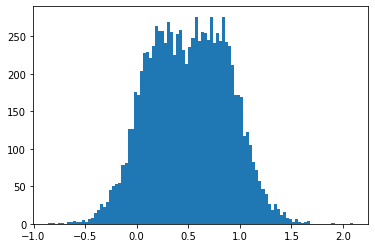

In [331]:
#stdev of RW vs. range of RW
stdevs = []
means = []
lowers = []
uppers = []
ranges = []
maxes = []
mins = []
for _ in range(10000):
    
    rw = create_random_walk(20)
    stdevs.append(rw.std())
    means.append(rw.mean())
    lower = rw.mean() - 2 * rw.std()
    upper = rw.mean() + 2 * rw.std()
    walkmax = rw.max()
    walkmin = rw.min()
    minmaxrange = rw.max() - rw.min()
    lowers.append(lower)
    uppers.append(upper)
    ranges.append(minmaxrange)
    maxes.append(walkmax)
    mins.append(walkmin)
    
#for LstStat in [stdevs, means, lowers, uppers]:
#    LstStat = np.array(LstStat)
stdevs = np.array(stdevs)
means = np.array(means)
lowers = np.array(lowers)
uppers = np.array(uppers)
ranges = np.array(ranges)
maxes = np.array(maxes)
mins = np.array(mins)
    

_ = plt.hist(- lowers/(uppers - lowers),bins=100)

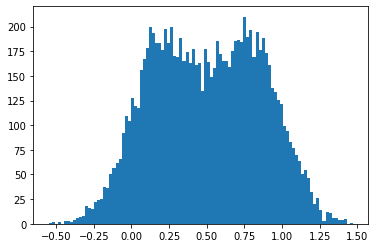

In [332]:
#stdev of RW vs. range of RW
stdevs = []
means = []
lowers = []
uppers = []
ranges = []
maxes = []
mins = []
for _ in range(10000):
    
    rw = create_random_walk(100)
    stdevs.append(rw.std())
    means.append(rw.mean())
    lower = rw.mean() - 2 * rw.std()
    upper = rw.mean() + 2 * rw.std()
    walkmax = rw.max()
    walkmin = rw.min()
    minmaxrange = rw.max() - rw.min()
    lowers.append(lower)
    uppers.append(upper)
    ranges.append(minmaxrange)
    maxes.append(walkmax)
    mins.append(walkmin)
    
#for LstStat in [stdevs, means, lowers, uppers]:
#    LstStat = np.array(LstStat)
stdevs = np.array(stdevs)
means = np.array(means)
lowers = np.array(lowers)
uppers = np.array(uppers)
ranges = np.array(ranges)
maxes = np.array(maxes)
mins = np.array(mins)
    

_ = plt.hist(- lowers/(uppers - lowers),bins=100)